## Programming session 3: Neural Networks, Part II 

### 3.1 Your first convolutional neural net

In this exercise, we will build convolutional neural networks with Keras and apply them to various datasets.
Go oline and download the CIFAR 10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html

While downloading the CIFAR 10 dataset, we will train a first neural network on the simpler CIFAR 10 dataset

__Exercise 3.1.1.__ Use the following lines to load the training and test data. Then display a couple of images using the 

In [13]:
import sys,pickle
import gzip
f = gzip.open('mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes')
f.close()
(x_train, y_train), (x_test, y_test) = data



In [28]:
# from keras.datasets import mnist
# import os

# # Setup train and test splits
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

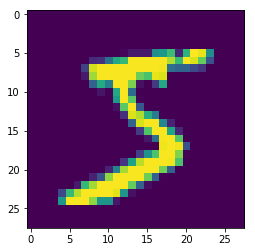

In [39]:
%matplotlib inline 

from matplotlib import pyplot as plt
plt.imshow(x_train[0], interpolation='nearest')
plt.show()

Reshape the training and test set and flatten the images so that your data matrix is of size $N_{\text{images}} * n^2$ where $n$ is the number of rows/columns of each image

__Exercise 3.1.2.__ To train our neural network, the first thing we will do is turn our labels into one hot encoding. That is binary vectors of the form $(1,0,\ldots, 0)$ where the $i^{th}$ entry is $1$ if the digit represented on the figure is the digit $i$ and $0$ otherwise. We can either do this manually, or we can use the built in function from Keras. 

- Start by writing a small routine that manually turns the labels from y_train and y_test into arrays of one hot encodings. We want the output to be an array of size $N_1\times K$ where $N-1$ is the number of points in the training and test sets and $K$ is the number of distinct classes in y. 

- One alternative is to use the built in implementation from Keras. Keras provide the function 'to_categorical' which takes as argument any vector of labels and return the one hot encoding.   
 

In [ ]:
# put your "manual" routine here


In [ ]:
# Alternatively, use the Keras implementation here

from keras.utils import to_categorical





__Exercise 3.1.3.__ We will use the class 'Sequential' from Keras together with dense (i.e fully connected layers). Building a neural network is easy with Keras. We initialize the model with the line 'model = Sequential()' then we use model.add(). To start we will build a simple one hidden layer neural network. Use the function 'add' to add two layers:
 - The first layer should be a dense layer with 32 neurons, each with a sigmoid activation function. This layer should take as input a vectorized image (hence the input size should be the size of your image, $n_{\text{row}} \times  n_{\text{cols}}$)
 
 - The second Output layer, should be dense and output a vector with $K$ elements (K corresponding to the number of classes). Which activation function should we choose according to you? 

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=42)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

__Exercise 3.1.4.__ Once your model is set up, you can use the function .summary() to display its features. What is the total number of parameters of your model? To train the model, we first need to specify which loss and which solver we want to use. This can be done with the compile function (check the documentation of the function ). Set "sgd" as your solver. The loss is what is optimized by the SGD algorithm when you train your network. As we deal with binary variables, "categorical_crossentropy" is a good idea. Finally, through the iterations, we might want to monitor the improvement of the model with respect to some criterion. You can specify such a criterion through the "metrics" argument of your call to compile. The "metrics" argument enables you to define an additional function to monitor through the iterations. We could for example display the the average number of misclassified images. This is can be done with metrics=['accuracy']

   - Call the function "compile"of your model with the parameters specified above (this should really be one line)

   - Now that the optimization is set up, we will train the model. To do this, we for other machine learning models in Keras, we use the function fit. Check the documentation of the function. For this function we need to specify a couple of arguments. The first two arguments are the training samples and labels. Now is also a good time to introduce the notions of batch and epochs. As we discussed before the parameter 'batch_size' is the number of (training) samples we use at each step of the stochastic gradient descent. The fourth parameter "epochs = ..." indicate the number of times you want to go through the whole dataset. 
    
    You can also play with verbose to display more or less information on the training of your network
    
    To get an intuition on the improvement of your model you could decide to train it on a subset of the data and keep a small fraction of the data to evaluate the generalization ability of your model throughout the iterations. This is done by setting the parameter "validation_split" to some fraction of the data.



In [ ]:
# put your code here


history = model.fit(...)


__Exercise 3.1.5.__ By using a call such as the one above, you get to keep track of the validation errors through the training of the model. 
Use the data stored in "history.history['acc']" and "history.history['val_acc']" to plot the evolution of the training and validation accuracy of your model. 

In [ ]:
# put your code here 


__Exercise 3.1.6__ We now want to study how weel other network architectures would perform on the same dataset. Write a simple function that takes as input an array with a number $N_{h}$ of layers and a number of neurons $N_{L,n}$ per layers. The function should return the same neural network as before except that we now want the architecture to include $N_{h}$ additional layers and $N_{L,n}$ neurons in each layers. You can choose the activation as you want (sigmoid is a good idea). 



In [ ]:
def NNdesign(layer_sizes):
    
    
    
    
    
    return NeuralNet  

__Exercise 3.1.7__ Use your function (together with the short code you wrote to set up the optimizer and train your network -- keep the same parameters for now) and display the evolutions of the training and validation errors through training for neural networks with 32 neurons and 1 to 4 hidden layers.  

In [ ]:
# put your code here 





__Exercise 3.1.8__ Use your three layers neural network and increase the number of epochs to 40. What do you see?

In [ ]:
# put your code here 


What is your conclusion in terms of depth ? What is important to train a deep neural network correctly?

In [ ]:
What is your conclusion in terms of depth ? What is important to train a deep neural network correctly

__Exercise 3.1.9__ Now instead of keeping the number of neurons constant for a varying number of layers, repeat your experiments with a single layer and study how the training and validation errors evolve when considering various number of neurons (take 32 68 and 128)


In [ ]:
# put your code here





### 3.2 A slightly more interesting dataset


Now you should be done with the CIFAR 10 download. Training a neural net on CIFAR is a little more involved but follows the same idea

In [ ]:

# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')



__Exercise 3.2.1__ Load the data using the lines below and display some of the images and the associated labels. 

In [ ]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Before building and training the neural net, we use the normalize the images

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

__Exercise 3.2.2__ Turn the labels into categorical variables as we did in MNIST

__Exercise 3.2.3__ Build your neural network with Keras following the guidelines below

- We want a sequential model
- First layer should be a 2d convolutional layer with 32 '3 by 3' filters
- Add a Dropout layer with 2% dropout (what is the effect of such a line?)
- Then add again a convolutional layer with 32 '3 by 3' filters
- Add the following line: model.add(MaxPooling2D(pool_size=(2, 2))). What is the effect of such a line?
- Flatten the output
- Then add a Desne layer of 512 units with relu activations. 
- Add another dropout layer (50% dropout)
- Add the output layer (Dense, num of output = num of possible classes and activation = softmax)

In the Dense and Convolutional layer, you might want to regularize by passing the additional argument "kernel_constraint=maxnorm(3)"


Use the following parameters to set up the optimization with the compile function: 

epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

In [ ]:

# Build your model below
